In [5]:
#author:nishant shetty
#problem statement:k means
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [7]:
x=np.array([[1,2],[1.5,2.5],[1.2,2.8],[4,6],[3,9],[2,3],[4,9],[3,0],[4,8],[2,6],[3,5],[2,4],[3,3],[7,6],[5,7],[5,3]])

In [8]:
class k_means():
    def  __init__(self,k=2,tol=0.0001,max_iter=300):#tol:how much the centroid will move
        #defining the self parameters
        self.k=k
        self.tol=tol
        self.max_iter=max_iter
##########################################################################################################
    #writing the fit function
    def fit(self,data):
        #step 1:place the centroids at random positions
        self.centroids={}
        for i in range(self.k):
            self.centroids[i]=data[i] #randomly choosing first k data points as centroid
            
        #step 2:for each data point find the nearest centroid
        for i in range(self.max_iter):
            self.classification={}
            for i in range(self.k):
                self.classification[i]=[] #creating k empty list for other data points to be classified 
            for j in data:
                distances=[np.linalg.norm(j-self.centroids[centroid]) for centroid in range(self.k)]#calculating the distance of each data point with centroids
                classi=distances.index(min(distances))#finding out the data point which has min. dist. with the centroid 
                self.classification[classi].append(j)
                prev_centroids=dict(self.centroids)
                
            #step3: calculate the mean of all points in each k cluster and assign the new centroid=mean
            for classification in self.classification:
                self.centroids[classification]=np.average(self.classification[classification],axis=0)
                
            #step4:calculate the shift of new centroid wrt to previous centroid if the shift is less than 'tol' we have reached the correct location  
            opt= True
            for j in self.centroids:
                
                orig_centroids=self.centroids[j]
                prev_centro=prev_centroids[j]
                print(prev_centro)
                print(orig_centroids)
                print(np.sum(((orig_centroids-prev_centro)/orig_centroids)*100))
                if np.sum(((orig_centroids-prev_centro)/orig_centroids)*100)>self.tol: #calculating the shift
                    opt= False
            
            print(opt)
            if opt:
                break
#######################################################################################################
#taking the i/p and plotting the k means graph
clf=k_means()
clf.fit(x)


[1. 2.]
[2. 1.]
-50.0
[1.5 2.5]
[3.33571429 5.30714286]
107.925794207752
False
[2. 1.]
[1.95       2.21666667]
52.32311548101021
[3.33571429 5.30714286]
[3.9 6.3]
30.228501657073082
False
[1.95       2.21666667]
[2.3375 2.5375]
29.22121826787141
[3.9 6.3]
[4. 7.]
12.500000000000004
False
[2.3375 2.5375]
[2.3375 2.5375]
0.0
[4. 7.]
[4. 7.]
0.0
True


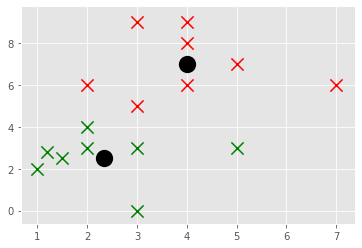

In [16]:
for centroid in clf.centroids:#plotting the centroids
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker='o',color='k',s=150,linewidths=5)
for clasi in clf.classification:#plotting all other data points
    colors=10*['g','r','c','b','k']
    color=colors[clasi]
    for feature in clf.classification[clasi]:
        plt.scatter(feature[0],feature[1],marker='x',color=color,s=150,linewidths=5)
plt.show()